# Tensorflow with GPU

This notebook provides an introduction to computing on a [GPU](https://cloud.google.com/gpu) in Colab. In this notebook you will connect to a GPU, and then run some basic TensorFlow operations on both the CPU and a GPU, observing the speedup provided by using the GPU.


## Enabling and testing the GPU

First, you'll need to enable GPUs for the notebook:

- Navigate to Edit→Notebook Settings
- select GPU from the Hardware Accelerator drop-down

Next, we'll confirm that we can connect to the GPU with tensorflow:

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

TensorFlow 2.x selected.
Found GPU at: /device:GPU:0


## Observe TensorFlow speedup on GPU relative to CPU

This example constructs a typical convolutional neural network layer over a
random image and manually places the resulting ops on either the CPU or the GPU
to compare execution speed.

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
import timeit

device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  print(
      '\n\nThis error most likely means that this notebook is not '
      'configured to use a GPU.  Change this in Notebook Settings via the '
      'command palette (cmd/ctrl-shift-P) or the Edit menu.\n\n')
  raise SystemError('GPU device not found')

def cpu():
  with tf.device('/cpu:0'):
    random_image_cpu = tf.random.normal((100, 100, 100, 3))
    net_cpu = tf.keras.layers.Conv2D(32, 7)(random_image_cpu)
    return tf.math.reduce_sum(net_cpu)

def gpu():
  with tf.device('/device:GPU:0'):
    random_image_gpu = tf.random.normal((100, 100, 100, 3))
    net_gpu = tf.keras.layers.Conv2D(32, 7)(random_image_gpu)
    return tf.math.reduce_sum(net_gpu)
  
# We run each op once to warm up; see: https://stackoverflow.com/a/45067900
cpu()
gpu()

# Run the op several times.
print('Time (s) to convolve 32x7x7x3 filter over random 100x100x100x3 images '
      '(batch x height x width x channel). Sum of ten runs.')
print('CPU (s):')
cpu_time = timeit.timeit('cpu()', number=10, setup="from __main__ import cpu")
print(cpu_time)
print('GPU (s):')
gpu_time = timeit.timeit('gpu()', number=10, setup="from __main__ import gpu")
print(gpu_time)
print('GPU speedup over CPU: {}x'.format(int(cpu_time/gpu_time)))

Time (s) to convolve 32x7x7x3 filter over random 100x100x100x3 images (batch x height x width x channel). Sum of ten runs.
CPU (s):
3.862475891000031
GPU (s):
0.10837535100017703
GPU speedup over CPU: 35x


In [ ]:
# Evalautaion of Linear Regression Model

In [35]:
# Cross Validation Regression MAE
import pandas
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.data"
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
dataframe = pandas.read_csv(url, delim_whitespace=True, names=names)
array = dataframe.values
X = array[:,0:13]
Y = array[:,13]
kfold = model_selection.KFold(n_splits=10, random_state=7, shuffle=True)
model = LinearRegression()
scoring = 'neg_mean_absolute_error'
results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print("MAE: %.3f (%.3f)" % (results.mean(), results.std()))

MAE: -3.387 (0.667)


In [36]:
# Cross Validation Regression MSE
import pandas
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.data"
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
dataframe = pandas.read_csv(url, delim_whitespace=True, names=names)
array = dataframe.values
X = array[:,0:13]
Y = array[:,13]
kfold = model_selection.KFold(n_splits=10, random_state=7, shuffle=True)
model = LinearRegression()
scoring = 'neg_mean_squared_error'
results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print("MSE: %.3f (%.3f)" % (results.mean(), results.std()))

MSE: -23.747 (11.143)


In [37]:
# Cross Validation Regression R^2
import pandas
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.data"
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
dataframe = pandas.read_csv(url, delim_whitespace=True, names=names)
array = dataframe.values
X = array[:,0:13]
Y = array[:,13]
kfold = model_selection.KFold(n_splits=10, random_state=7, shuffle=True)
model = LinearRegression()
scoring = 'r2'
results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print("R^2: %.3f (%.3f)" % (results.mean(), results.std()))

R^2: 0.718 (0.099)


In [55]:
from sklearn.metrics import mean_absolute_error

In [56]:
y_true = [3,-.05,2,7]
y_pred = [2.5, 0.0, 2, 8]

In [57]:
mean_absolute_error(y_true,y_pred)

0.3875

In [58]:
from sklearn.metrics import mean_squared_error

In [59]:
mean_squared_error(y_true,y_pred)

0.313125

In [60]:
from sklearn.metrics import r2_score

In [61]:
r2_score(y_true,y_pred)

0.952379820830264

In [ ]:
# Assumption of Linear Regression Model

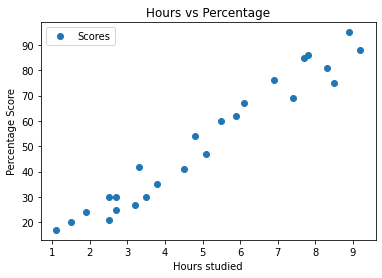

In [38]:
## Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load dataset
df = pd.read_csv('/content/student_score.csv')
df.plot(x='Hours',y='Scores',style='o')

## Plot the graph
plt.title("Hours vs Percentage")    ## For linear regression assumptions
plt.xlabel("Hours studied")
plt.ylabel("Percentage Score")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'frequency')

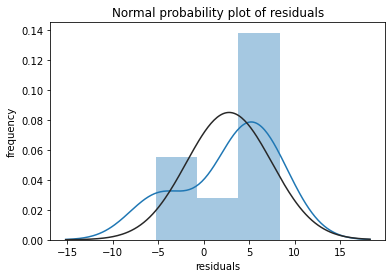

In [39]:
## For checking the distrbution

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
from scipy.stats import norm

## input is the number of hours devoted
X = df.iloc[:,:-1].values
## output is percentage scored
y = df.iloc[:,1].values
## splitting the dataset
X_train,X_test,y_train,y_test = train_test_split(X, y,
test_size=0.3, random_state=21)

## training model
model = LinearRegression()
model.fit(X_train,y_train)
## making predictions
y_pred = model.predict(X_test)
residual = y_test-y_pred
sns.distplot(residual , fit=norm)
plt.title("Normal probability plot of residuals")
plt.xlabel("residuals")
plt.ylabel("frequency")

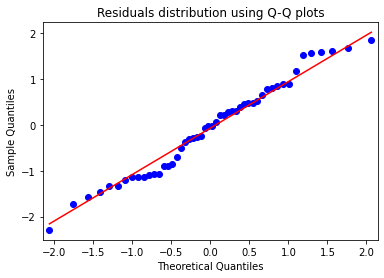

In [40]:
## For checking the distrbution with Q-Q plots
import statsmodels.api as sm
import pylab as py
# Randomly generating data points
data = np.random.normal(0,1,50)
sm.qqplot(data, line ='s')
py.title("Residuals distribution using Q-Q plots")
py.show()

In [ ]:
K-S (0-1) # 0.05 

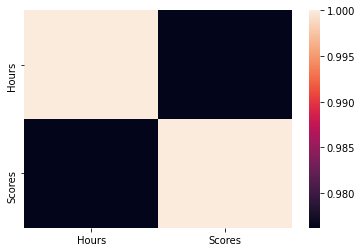

In [41]:
## Creating heatmap 

import seaborn as sns
# visualizing the relation between student's score and marks scored
sns.heatmap(df.corr())

In [42]:
## importing statsmodels
import numpy as np
from statsmodels.stats.stattools import durbin_watson

a = np.array([1, 2, 3,6,7,8])
## using statsmodels.durbin_watson()
d = durbin_watson(a)  
print(d)

0.07975460122699386


In [ ]:
DW = 2 (NO AutoCorr)
DW 0 and 2 (+ve Corr)
DW 2 and 4 (-ve Corr)

In [ ]:
# Another Case Study Advertisement Delima

In [63]:
# imports
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
import numpy as np

# allow plots to appear directly in the notebook
%matplotlib inline

In [62]:
data = pd.read_csv('/content/Advertising.csv', index_col=0)
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [64]:
data.isnull().values.any()

False

In [65]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [66]:
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


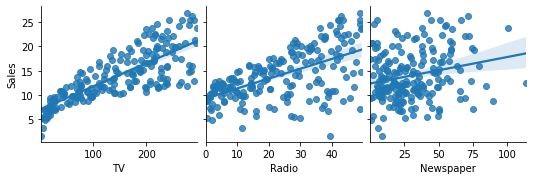

In [67]:
sns.pairplot(data,x_vars = ["TV","Radio","Newspaper"],y_vars = "Sales",kind="reg")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f61f9da3050>,
      dtype=object)

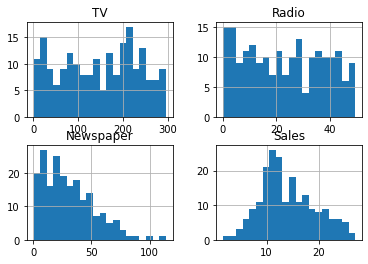

In [68]:
data.hist(bins=20)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


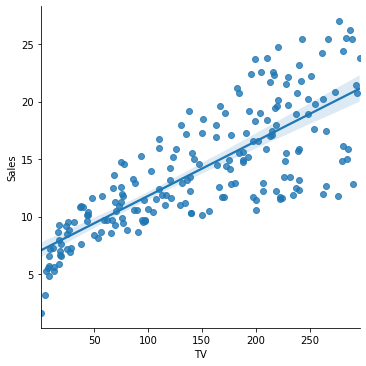

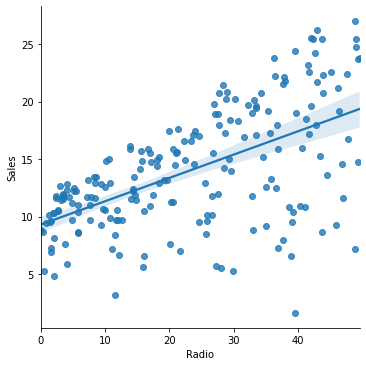

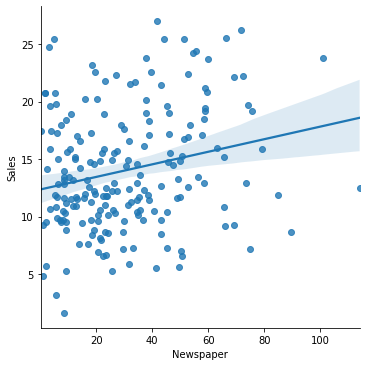

In [69]:
sns.lmplot('TV','Sales',data=data)
sns.lmplot('Radio','Sales',data=data)
sns.lmplot('Newspaper','Sales',data=data)

In [ ]:
# Assumption (Test of Normality)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


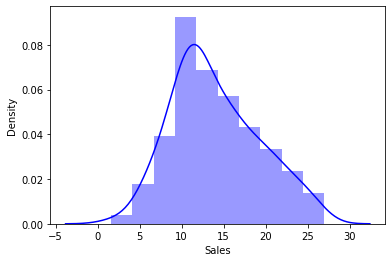

In [71]:
sns.distplot(data.Sales,bins=10, color="blue",hist=True)

In [73]:
num_cols = data[["TV","Radio","Newspaper"]]
a = data.corr()['Sales'].sort_values(ascending=False)
print(a)

Sales        1.000000
TV           0.782224
Radio        0.576223
Newspaper    0.228299
Name: Sales, dtype: float64


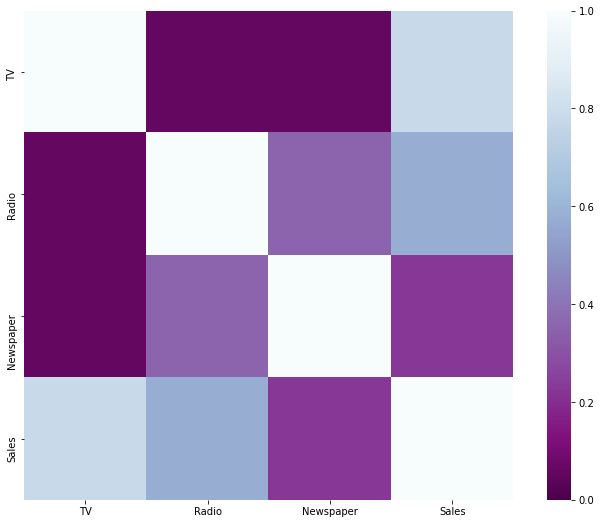

In [75]:
corrmap = data.corr()
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmap, vmin = 0, vmax = 1, square=True, cmap="BuPu_r",ax=ax)
plt.show()

In [77]:
X = data.drop('Sales',axis=1)
y = data[['Sales']]

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state = 33)

In [79]:
model = [('LinearRegression',LinearRegression())]

In [81]:
lin_model = smf.ols(formula="Sales~TV+Radio+Newspaper",data=data).fit()

In [82]:
print(lin_model.params,"\n")
print(lin_model.summary())

Intercept    2.938889
TV           0.045765
Radio        0.188530
Newspaper   -0.001037
dtype: float64 

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sun, 18 Apr 2021   Prob (F-statistic):           1.58e-96
Time:                        18:46:04   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------

In [83]:
lin_model = smf.ols(formula="Sales~TV+Radio",data=data).fit()

In [84]:
print(lin_model.params,"\n")
print(lin_model.summary())

Intercept    2.921100
TV           0.045755
Radio        0.187994
dtype: float64 

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Sun, 18 Apr 2021   Prob (F-statistic):           4.83e-98
Time:                        18:48:08   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------

In [5]:
data.shape

(200, 4)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


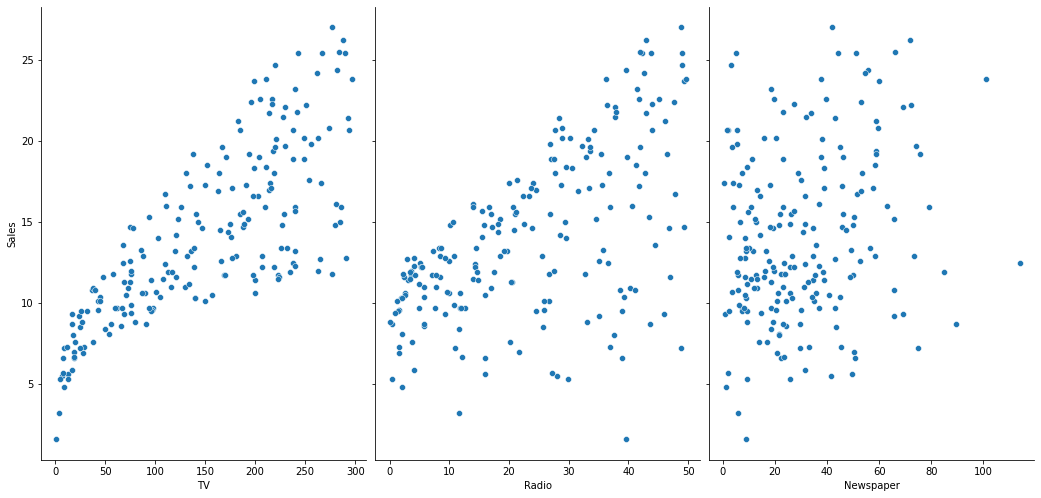

In [6]:
sns.pairplot(data, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', size=7, aspect=0.7)

In [7]:
### STATSMODELS ###

# create a fitted model
lm1 = smf.ols(formula='Sales ~ TV', data=data).fit()

# print the coefficients
lm1.params

Intercept    7.032594
TV           0.047537
dtype: float64

In [85]:
### SCIKIT-LEARN ###

# create X and y
feature_cols = ['Radio']
X = data[feature_cols]
y = data.Sales

# instantiate and fit
lm2 = LinearRegression()
lm2.fit(X, y)

# print the coefficients
print(lm2.intercept_)
print(lm2.coef_)

9.311638095158283
[0.20249578]


In [9]:
# manually calculate the prediction
7.032594 + 0.047537*50

9.409444

In [10]:
### STATSMODELS ###

# you have to create a DataFrame since the Statsmodels formula interface expects it
X_new = pd.DataFrame({'TV': [50]})

# predict for a new observation
lm1.predict(X_new)

0    9.409426
dtype: float64

In [11]:
### SCIKIT-LEARN ###

# predict for a new observation
lm2.predict(50)

ValueError: ignored

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


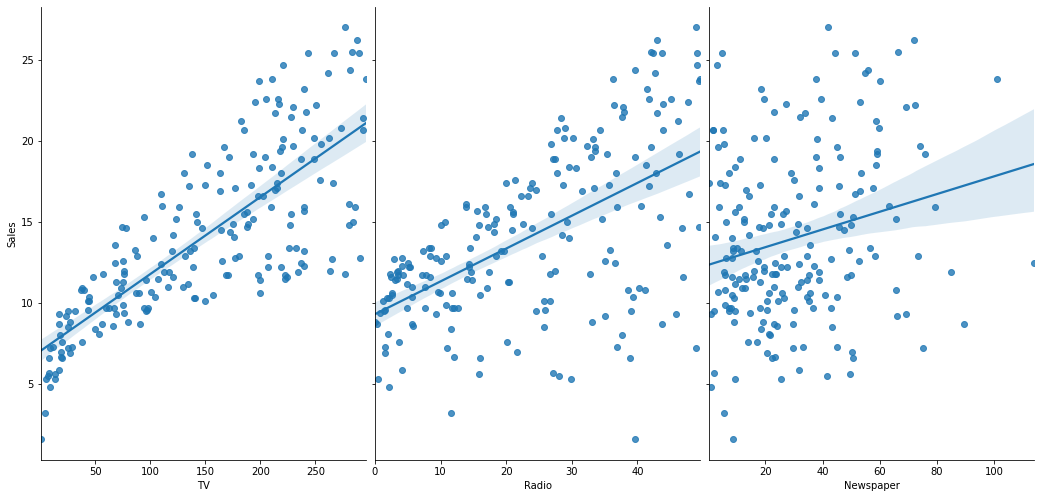

In [12]:
sns.pairplot(data, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', size=7, aspect=0.7, kind='reg')

In [13]:
### STATSMODELS ###

# print the confidence intervals for the model coefficients
lm1.conf_int()

,0,1
Intercept,6.129719,7.935468
TV,0.042231,0.052843


In [14]:
### STATSMODELS ###

# print the p-values for the model coefficients
lm1.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

In [15]:
### STATSMODELS ###

# print the R-squared value for the model
lm1.rsquared

0.611875050850071

In [16]:
### SCIKIT-LEARN ###

# print the R-squared value for the model
lm2.score(X, y)

0.611875050850071

In [86]:
### STATSMODELS ###

# create a fitted model with all three features
lm1 = smf.ols(formula='Sales ~ TV + Radio', data=data).fit()

# print the coefficients
lm1.params

Intercept    2.921100
TV           0.045755
Radio        0.187994
dtype: float64

In [87]:
### SCIKIT-LEARN ###

# create X and y
feature_cols = ['TV', 'Radio']
X = data[feature_cols]
y = data.Sales

# instantiate and fit
lm2 = LinearRegression()
lm2.fit(X, y)

# print the coefficients
print(lm2.intercept_)
print(lm2.coef_)

2.921099912405138
[0.04575482 0.18799423]


In [88]:
# pair the feature names with the coefficients
list(zip(feature_cols, lm2.coef_))

[('TV', 0.045754815101076145), ('Radio', 0.18799422662030918)]

In [89]:
### STATSMODELS ###

# print a summary of the fitted model
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Sun, 18 Apr 2021   Prob (F-statistic):           4.83e-98
Time:                        18:58:49   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
Radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
### STATSMODELS ###

# only include TV and Radio in the model

# instantiate and fit model
lm1 = smf.ols(formula='Sales ~ TV + Radio', data=data).fit()

# calculate r-square 
lm1.rsquared

0.8971942610828956

In [22]:
# add Newspaper to the model (which we believe has no association with Sales)
lm1 = smf.ols(formula='Sales ~ TV + Radio + Newspaper', data=data).fit()
lm1.rsquared

0.8972106381789522

In [23]:
# define true and predicted response values
y_true = [100, 50, 30, 20]
y_pred = [90, 50, 50, 30]

# calculate MAE, MSE, RMSE
print(metrics.mean_absolute_error(y_true, y_pred))
print(metrics.mean_squared_error(y_true, y_pred))
print(np.sqrt(metrics.mean_squared_error(y_true, y_pred)))

10.0
150.0
12.24744871391589


In [25]:
# include Newspaper
X = data[['TV', 'Radio', 'Newspaper']]
y = data.Sales

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Instantiate model
lm2 = LinearRegression()

# Fit Model
lm2.fit(X_train, y_train)

# Predict
y_pred = lm2.predict(X_test)

# RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.404651423032895


In [26]:
# exclude Newspaper
X = data[['TV', 'Radio']]
y = data.Sales

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Instantiate model
lm2 = LinearRegression()

# Fit model
lm2.fit(X_train, y_train)

# Predict
y_pred = lm2.predict(X_test)

# RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.387903469938289


In [27]:
# set a seed for reproducibility
np.random.seed(12345)

# create a Series of booleans in which roughly half are True
nums = np.random.rand(len(data))
mask_large = nums > 0.5

# initially set Size to small, then change roughly half to be large
data['Size'] = 'small'

# Series.loc is a purely label-location based indexer for selection by label
data.loc[mask_large, 'Size'] = 'large'
data.head()

,TV,Radio,Newspaper,Sales,Size
1,230.1,37.8,69.2,22.1,large
2,44.5,39.3,45.1,10.4,small
3,17.2,45.9,69.3,9.3,small
4,151.5,41.3,58.5,18.5,small
5,180.8,10.8,58.4,12.9,large


In [28]:
# create a new Series called Size_large
data['Size_large'] = data.Size.map({'small':0, 'large':1})
data.head()

,TV,Radio,Newspaper,Sales,Size,Size_large
1,230.1,37.8,69.2,22.1,large,1
2,44.5,39.3,45.1,10.4,small,0
3,17.2,45.9,69.3,9.3,small,0
4,151.5,41.3,58.5,18.5,small,0
5,180.8,10.8,58.4,12.9,large,1


In [29]:
# create X and y
feature_cols = ['TV', 'Radio', 'Newspaper', 'Size_large']
X = data[feature_cols]
y = data.Sales

# instantiate
lm2 = LinearRegression()
# fit
lm2.fit(X, y)

# print coefficients
list(zip(feature_cols, lm2.coef_))

[('TV', 0.04571982092436277),
 ('Radio', 0.1887281431342785),
 ('Newspaper', -0.001097679448351624),
 ('Size_large', 0.05742385085482783)]

In [30]:
# set a seed for reproducibility
np.random.seed(123456)

nums = np.random.rand(len(data))
mask_suburban = (nums > 0.33) & (nums < 0.66)
mask_urban = nums > 0.66
data['Area'] = 'rural'
# Series.loc is a purely label-location based indexer for selection by label
data.loc[mask_suburban, 'Area'] = 'suburban'
data.loc[mask_urban, 'Area'] = 'urban'
data.head()

,TV,Radio,Newspaper,Sales,Size,Size_large,Area
1,230.1,37.8,69.2,22.1,large,1,rural
2,44.5,39.3,45.1,10.4,small,0,urban
3,17.2,45.9,69.3,9.3,small,0,rural
4,151.5,41.3,58.5,18.5,small,0,urban
5,180.8,10.8,58.4,12.9,large,1,suburban


In [31]:
# create three dummy variables using get_dummies
pd.get_dummies(data.Area, prefix='Area').head()

,Area_rural,Area_suburban,Area_urban
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1
5,0,1,0


In [32]:
area_dummies = pd.get_dummies(data.Area, prefix='Area').iloc[:, 1:]
area_dummies.head()

,Area_suburban,Area_urban
1,0,0
2,0,1
3,0,0
4,0,1
5,1,0


In [33]:
data = pd.concat([data, area_dummies], axis=1)
data.head()

,TV,Radio,Newspaper,Sales,Size,Size_large,Area,Area_suburban,Area_urban
1,230.1,37.8,69.2,22.1,large,1,rural,0,0
2,44.5,39.3,45.1,10.4,small,0,urban,0,1
3,17.2,45.9,69.3,9.3,small,0,rural,0,0
4,151.5,41.3,58.5,18.5,small,0,urban,0,1
5,180.8,10.8,58.4,12.9,large,1,suburban,1,0


In [34]:
# create X and y
feature_cols = ['TV', 'Radio', 'Newspaper', 'Size_large', 'Area_suburban', 'Area_urban']
X = data[feature_cols]
y = data.Sales

# instantiate and fit
lm2 = LinearRegression()
lm2.fit(X, y)

# print the coefficients
list(zip(feature_cols, lm2.coef_))

[('TV', 0.04574401036331374),
 ('Radio', 0.18786669552525798),
 ('Newspaper', -0.0010876977267109122),
 ('Size_large', 0.07739660749747915),
 ('Area_suburban', -0.10656299015958612),
 ('Area_urban', 0.26813802165220074)]

In [ ]:
# Second Method

In [45]:
# Creating DataFrame out of Advertising.csv
df = pd.read_csv("Advertising.csv")
df.drop("Unnamed: 0", axis=1,inplace=True)
 
# Separating Independent and dependent variables
X=df.drop(['Sales'],axis=1)
Y=df.Sales
 
# Fit Linear Regression
lr = LinearRegression()
model=lr.fit(X,Y)
y_pred1 = model.predict(X)
print("R-squared: {0}".format(metrics.r2_score(Y,y_pred1)))


R-squared: 0.8972106381789522


Text(0, 0.5, 'Residuals')

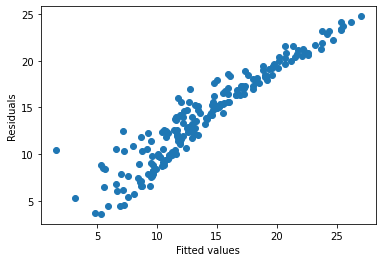

In [48]:
plt.scatter(Y, (y_pred1))
plt.xlabel("Fitted values")
plt.ylabel("Residuals")

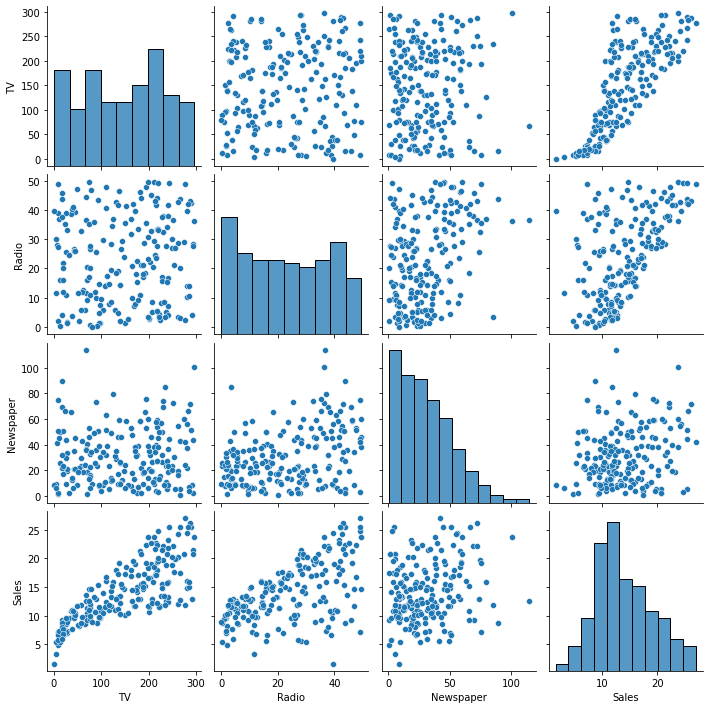

In [49]:
sns.pairplot(df)

In [50]:
from sklearn.preprocessing import PolynomialFeatures 
   
poly = PolynomialFeatures(degree = 2) 
X_poly = poly.fit_transform(X) 
   
poly.fit(X_poly, Y) 
X_poly = sm.add_constant(X_poly)
results = sm.OLS(Y,X_poly).fit()
 
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     1543.
Date:                Sun, 18 Apr 2021   Prob (F-statistic):          1.72e-172
Time:                        16:51:17   Log-Likelihood:                -183.14
No. Observations:                 200   AIC:                             386.3
Df Residuals:                     190   BIC:                             419.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.0848      0.239     21.279      0.0

NameError: ignored

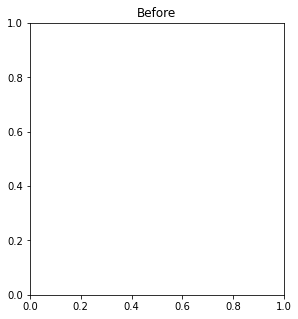

In [54]:
plt.subplots(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("Before")
plt.scatter(y_pred1, (Y-ypred1))
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
 
plt.subplot(1,2,2)
plt.title("After")
plt.scatter(ypred2, (Y-ypred2))
plt.xlabel("Fitted values")
plt.ylabel("Residuals")